# Analyzing Data to Investigate Risk Factors in Heart Failure Patients to Predict Mortality 

### Introduction

A prevalent complex clinical combination of symptoms and signs known as heart failure is brought on by a decrease in the heart's function as a pump supporting the circulatory system (National Guideline Centre, 2018). The death risk in the first year after treatment is about 35% while the risk of death is less than 10% in the second year for those that are still alive (National Clinical Guideline Centre, 2010). Data analysis on heart failure is significant because it can provide valuable insights into the causes and  risk factors of heart failure. We will look into different patients’ health reports and their experience of heart failure to help us determine the factors that are most influential in predicting possible death of patients with heart failure. 


<img src="hiiii.jpeg" width="250"> <img src="hellooooo.jpeg" width="250">

This leads to the question: **Is it possible to predict whether a patient who has already experienced heart failure will die based on the most influential components of a patient's health?**


To answer this question, we will examine a dataset made up of 13 attributes among 299 patients. This data was retrieved from the `heart_failure_clinical_records_dataset.csv` file in the Heart Disease dataset directory, which may be accessed at: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records (Chicco et al., 2020).


|Variable|Unit|Values|
|--------|----|---------------|
|age: age of the patient|years|positive integers|
|anaemia: decrease of red blood cells or hemoglobin|NA|0 = false; 1 = true|
|high_blood_pressure: if the patient has hypertension|NA|0 = false; 1 = true|
|creatinine_phosphokinase: level of the CPK enzyme in the blood|mcg/L|positive integers|
|diabetes: if the patient has diabetes|NA|0 = false; 1 = true|
|ejection_fraction: percentage of blood leaving the heart at each contraction|%|positive integers|
|platelets: platelets in the blood|kiloplatelets/mL|positive integers|
|sex: woman or man|NA|0 = female; 1 = male|
|serum_creatinine: level of serum creatinine in the blood|mg/dL|positive numbers|
|serum_sodium: level of serum sodium in the blood|mEq/L|positive integers|
|smoking: if the patient smokes or not|NA|0 = false; 1 = true|
|time: follow-up period (285 days)|days|positive integers|
|DEATH_EVENT: if the patient deceased during the follow-up period|NA|0 = false; 1 = true|



From this table, we can see that our dataset includes many variables. However, for our model to be accurate, we need to include only those which have a significant effect on mortality. According to a study conducted by Ahmad et al. (2017), the variables `age`, `anaemia`, `high_blood_pressure`, `ejection_fraction`, `serum_creatinine` and `serum_sodium` had the greatest influence on the accuracy of their prediction model and as such we will use these variables too.

### Methods

Our objective is to predict the death_event class using the optimal predictor variables, which we will select, to build a K-NN Classification model. The measures we will take to do this are as follows:
1. Read-in and tidy the dataset: After loading in the dataset, it must be tidied.
2. Train/Test split: The dataset is split into training and testing sets and the accuracy is determined through cross-validation.
3. Analyze and summarise our training set: Using scatterplot and bar graph, the cross-validation of the training data is visualized to see the variance in the range and median of the different attributes.
4. Discover the ideal 𝑘  value and construct our final model.
5. Evaluation and Conclusion.


### Expected Outcomes

With our algorithm that accurately forecasts fatality in patients with heart failure, our expected outcome would be to correctly predict whether a patient having heart failure will die based on the most influential components affecting it.
	
There is a huge impact of our findings as our results can have real-world implications since we could use this model to predict the likelihood that a person having heart failure will die and administer the appropriate level of treatment and monitoring based on other health variables that may be of concern.

Future questions that may be resulted from this is if there are any other variables that are in or outside this datatable that will make the classification more accurate in determining the likelihood of death from a patient who’s been through heart failure.


### Preliminary exploratory data analysis

First, load the libraries:

In [1]:
install.packages("themis")

library(repr)
library(tidyverse)
library(tidymodels)
library(cowplot)
library(GGally)
library(themis)

also installing the dependencies ‘RANN’, ‘ROSE’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   

**Reading in the dataset from the web** and selecting 8 rows to observe.

In [2]:
heart_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv")
slice_sample(heart_data, n = 8)

Rows: 299 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): age, anaemia, creatinine_phosphokinase, diabetes, ejection_fractio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
60,0,68,0,20,0,119000,2.9,127,1,1,64,1
77,1,418,0,45,0,223000,1.8,145,1,0,180,1
55,0,66,0,40,0,203000,1.0,138,1,0,233,0
57,1,115,0,25,1,181000,1.1,144,1,0,79,0
57,1,129,0,30,0,395000,1.0,140,0,0,42,1
61,1,80,1,38,0,282000,1.4,137,1,0,213,0
52,0,190,1,38,0,382000,1.0,140,1,1,258,0
50,0,1548,0,30,1,211000,0.8,138,1,0,108,0


Looking at the `DEATH_EVENT` column, if the variable is 0, it means that the patient is alive. If the variable is 1, it means that the the patient died.

In [3]:
heart_data <- select(heart_data, -anaemia, -diabetes, -high_blood_pressure, -sex, -smoking)
slice_sample(heart_data, n = 8)

age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
70,125,25,237000,1.0,140,15,1
70,618,35,327000,1.1,142,245,0
57,115,25,181000,1.1,144,79,0
68,157,60,208000,1.0,140,237,0
58,200,60,300000,0.8,137,104,0
45,981,30,136000,1.1,137,11,1
40,624,35,301000,1.0,142,214,0
65,160,20,327000,2.7,116,8,1


We will then check if any rows contain NA's and remove them.

In [4]:
heart_data[rowSums(is.na(heart_data)) > 0, ]

age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


There aren't any rows containing any missing values. Therefore we do not have to remove any cases from the dataframe.

We then used `mutate` to convert all predictors into numeric data; convert target variable to a factor using `as_factor`.

In [5]:
heart_data <- heart_data |>
  mutate(DEATH_EVENT = as_factor(DEATH_EVENT))

slice(heart_data, 1)

age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
75,582,20,265000,1.9,130,4,1


**After tidying our data to a format that is suitable for analysis, we continue to next step by focusing specifically on the training data.**
<br>We choose to split 75% of our original data set into the training set.

In [6]:
set.seed(2023)

heart_split <- initial_split(heart_data, prop = 0.75, strata = DEATH_EVENT)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

Since all of the predictor variables contains quantitative data, we used `group_by` to separate each class label, and find the mean of each predictor variable under each class label using `summarize` + `across`.

In [7]:
observations <- heart_data |>
    group_by(DEATH_EVENT) |>
    summarize(across(age:serum_sodium, mean))

observations

DEATH_EVENT,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,58.76191,540.0542,40.26601,266657.5,1.184877,137.2167
1,65.21528,670.1979,33.46875,256381.0,1.835833,135.3750


**We can also find the mean of all predictor variables.**

In [8]:
observations_2 <- heart_train |> 
summarize(across(age:serum_sodium, mean))

observations_2

age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
61.26935,550.2902,37.26786,265194.4,1.359955,136.433


**Next, we use `group_by` + `summarize` to find out the distribution of each of our target variable (DEATH_EVENT).**

In [9]:
observations_count <- heart_train |>
    group_by(DEATH_EVENT) |>
    summarize(count=n())
observations_count

DEATH_EVENT,count
<fct>,<int>
0,152
1,72


**We can use a bar graph to plot the distribution.**

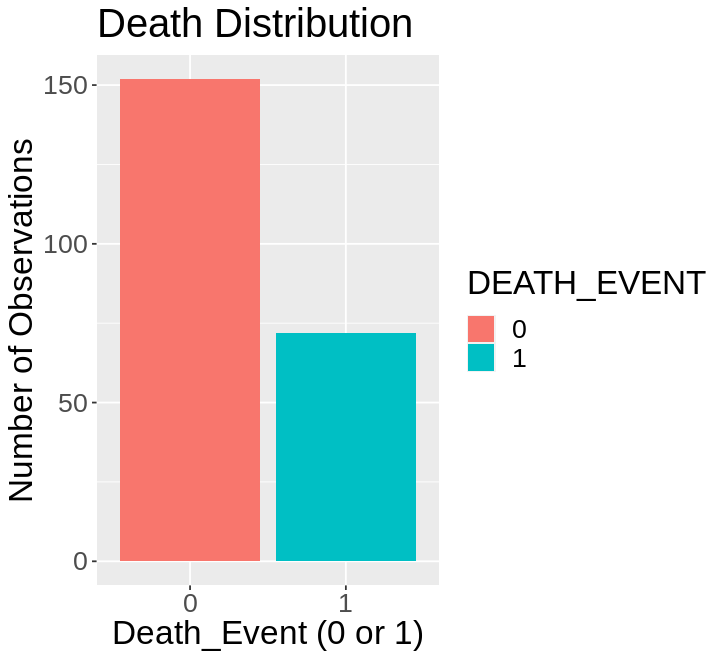

In [10]:
options(repr.plot.width = 6, repr.plot.height = 5.5)

heart_plot <- ggplot(observations_count, aes(x = DEATH_EVENT, y = count, fill = DEATH_EVENT)) +
  geom_bar(stat = "identity") +
  labs(x = "Death_Event (0 or 1)", y = "Number of Observations") +
  ggtitle("Death Distribution") +
  theme(text = element_text(size = 20))

heart_plot

One problem that could arise when making a prediction model on our data set is class imbalance, where some classes have fewer instances than others. To address this in our final project, we plan to incorporate an oversampling step using the `step_upsample` function from the `themis` R package. This will solve the problem of the underrepresented class not having enough data in the K-nearest neighbor algorithm.

In [11]:
age_graph <- ggplot(heart_train, aes(x = age, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Age") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
creatinine_phosphokinase_graph <- ggplot(heart_train, aes(x = creatinine_phosphokinase, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Creatinine Phosphokinase") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
ejection_fraction_graph <- ggplot(heart_train, aes(x = ejection_fraction, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Ejection Fraction") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
serum_creatinine_graph <- ggplot(heart_train, aes(x = serum_creatinine, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Serum Creatinine") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
platelets_graph <- ggplot(heart_train, aes(x = platelets, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Platelets") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
serum_sodium_graph <- ggplot(heart_train, aes(x = serum_sodium, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Serum Sodium") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
time_graph <- ggplot(heart_train, aes(x = time, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Time") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))

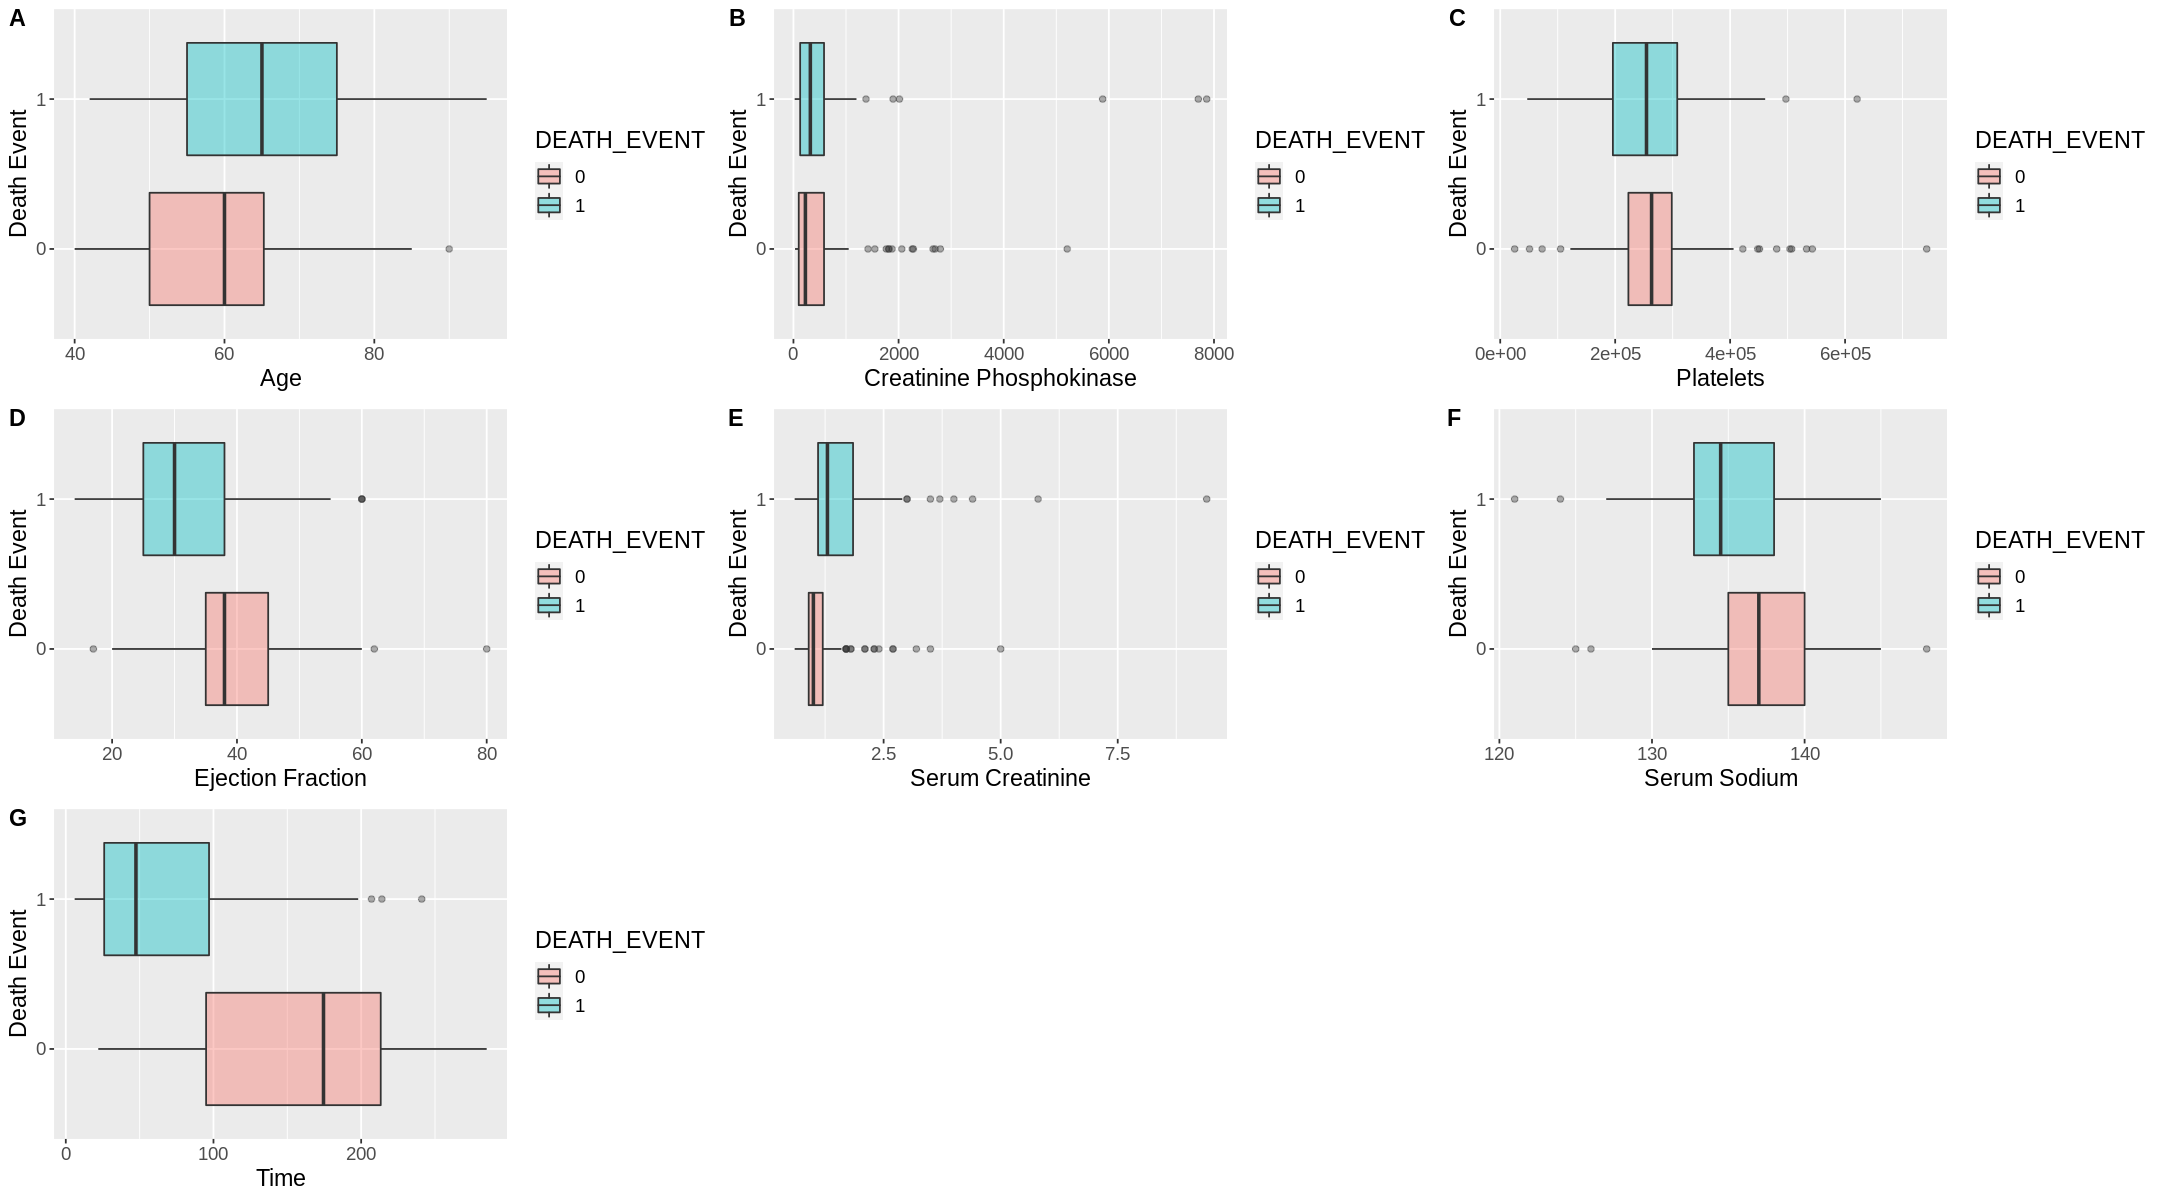

In [12]:
options(repr.plot.width = 18, repr.plot.height = 10)

plot_grid(age_graph,
          creatinine_phosphokinase_graph,
          platelets_graph,
          ejection_fraction_graph, 
          serum_creatinine_graph,
          serum_sodium_graph,
          time_graph,
          labels = c("A", "B", "C", "D", "E", "F", "G"),
          ncol = 3)

- We can visualize the range and median of values for each predictor variable separated by `DEATH_EVENT` using `ggplot()` and `geom_boxplot()`.
- By looking at the boxplots for our training/testing split, we can see that the variables `age`, `ejectioin_fraction`, `serum_sodium`, and `time` vary in range and median for each category of `DEATH_EVENT`. This means that they may have a significant impact on predicting whether patients die or not.
- From the plots of `creatinine_phosphokinase`, `platelets`, and `serum_creatinine`, we can see that they do not vary much in range, median or both.

In [13]:
apply(heart_train, 2, sd)

age creatinine_phosphokinase        ejection_fraction 
            1.227725e+01             9.809120e+02             1.163147e+01 
               platelets         serum_creatinine             serum_sodium 
            9.580172e+04             9.074423e-01             4.012869e+00 
                    time              DEATH_EVENT 
            7.746873e+01             4.680709e-01

- We can `apply()` the `sd` function to all columns in `heart_train` to find the standard deviation of each predictor variable. 
- By looking at the standard deviation of each predictor variable, we can see that `serum_creatinine`, `serum_sodium`, and `DEATH_EVENT` have data clustered around the mean more than the other predictor variables.

### Analyzing and Selecting Predictor Variables

- To find out how many variables are needed for the highest accuracy, we will create distinct recipes for each set of variables. Then we will compare the accuracy of the models. 
- This can be done by tuning for the first 20 k values performing 5 fold cross validation.
- The data must be scaled and centered to ensure that every single variable doesn't have too large or too little of an effect on the prediction model.

In [14]:
heart_vfold <- vfold_cv(heart_train, v = 5, strata = DEATH_EVENT)

gridvals <- tibble(neighbors = seq(1, 20))

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

In [15]:
a_recipe <- recipe(DEATH_EVENT ~ age, heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

a_results <- workflow() |>
    add_recipe(a_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

a_results_best <- a_results |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(mean)

In [16]:
ae_recipe <- recipe(DEATH_EVENT ~ age + ejection_fraction, heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

ae_results <- workflow() |>
    add_recipe(ae_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

ae_results_best <- ae_results |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(mean)

In [17]:
aes_recipe <- recipe(DEATH_EVENT ~ age + ejection_fraction + serum_sodium, heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

aes_results <- workflow() |>
    add_recipe(aes_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

aes_results_best <- aes_results |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(mean)

In [18]:
aest_recipe <- recipe(DEATH_EVENT ~ age + ejection_fraction + serum_sodium + time, heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

aest_results <- workflow() |>
    add_recipe(aest_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

aest_results_best <- aest_results |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(mean)

In [19]:
model <- c("age", 
           "age + ejection_fraction", 
           "age + ejection_fraction + serum_sodium", 
           "age + ejection_fraction + serum_sodium + time")

accuracy <- c(a_results_best, ae_results_best, aes_results_best, aest_results_best)

accuracy_table <- tibble(`Predictor Variables` = model, `Accuracy` = accuracy)

accuracy_table

Predictor Variables,Accuracy
<chr>,<dbl>
age,0.7094862
age + ejection_fraction,0.7638340
age + ejection_fraction + serum_sodium,0.7369565
age + ejection_fraction + serum_sodium + time,0.8355731


- Looking at the table, we can see that using all four variables yields the highest prediction accuracy.
- Hence, we will use all four variables to build our prediction variables.

### Finding the Optimal `K` Value and Building the Final Model

- Using a large range of `K` values will increase the processing time. As Lall and Sharma note, the optimal `K` value is approximately equal to the square root of the number of observations.
- Hence, our `K` value is approximately equal to $\sqrt{160}$.
- Therefore, we will test for the first 20 `K` values. 

In [20]:
k_vals <- tibble(neighbors = 1:20)


heart_results <- workflow() |>
    add_recipe(aest_recipe) |> # aest_recipe is previously defined
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
heart_results |>
    arrange(desc(mean))

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,accuracy,binary,0.8355731,5,0.01752553,Preprocessor1_Model07
8,accuracy,binary,0.8355731,5,0.01752553,Preprocessor1_Model08
3,accuracy,binary,0.8302372,5,0.01144881,Preprocessor1_Model03
4,accuracy,binary,0.8302372,5,0.01144881,Preprocessor1_Model04
9,accuracy,binary,0.8084980,5,0.01956522,Preprocessor1_Model09
10,accuracy,binary,0.8084980,5,0.01956522,Preprocessor1_Model10
13,accuracy,binary,0.8041502,5,0.01753333,Preprocessor1_Model13
14,accuracy,binary,0.8041502,5,0.01753333,Preprocessor1_Model14
5,accuracy,binary,0.8037549,5,0.01998541,Preprocessor1_Model05


Plot the data from the table above to find the optimal `K` value.

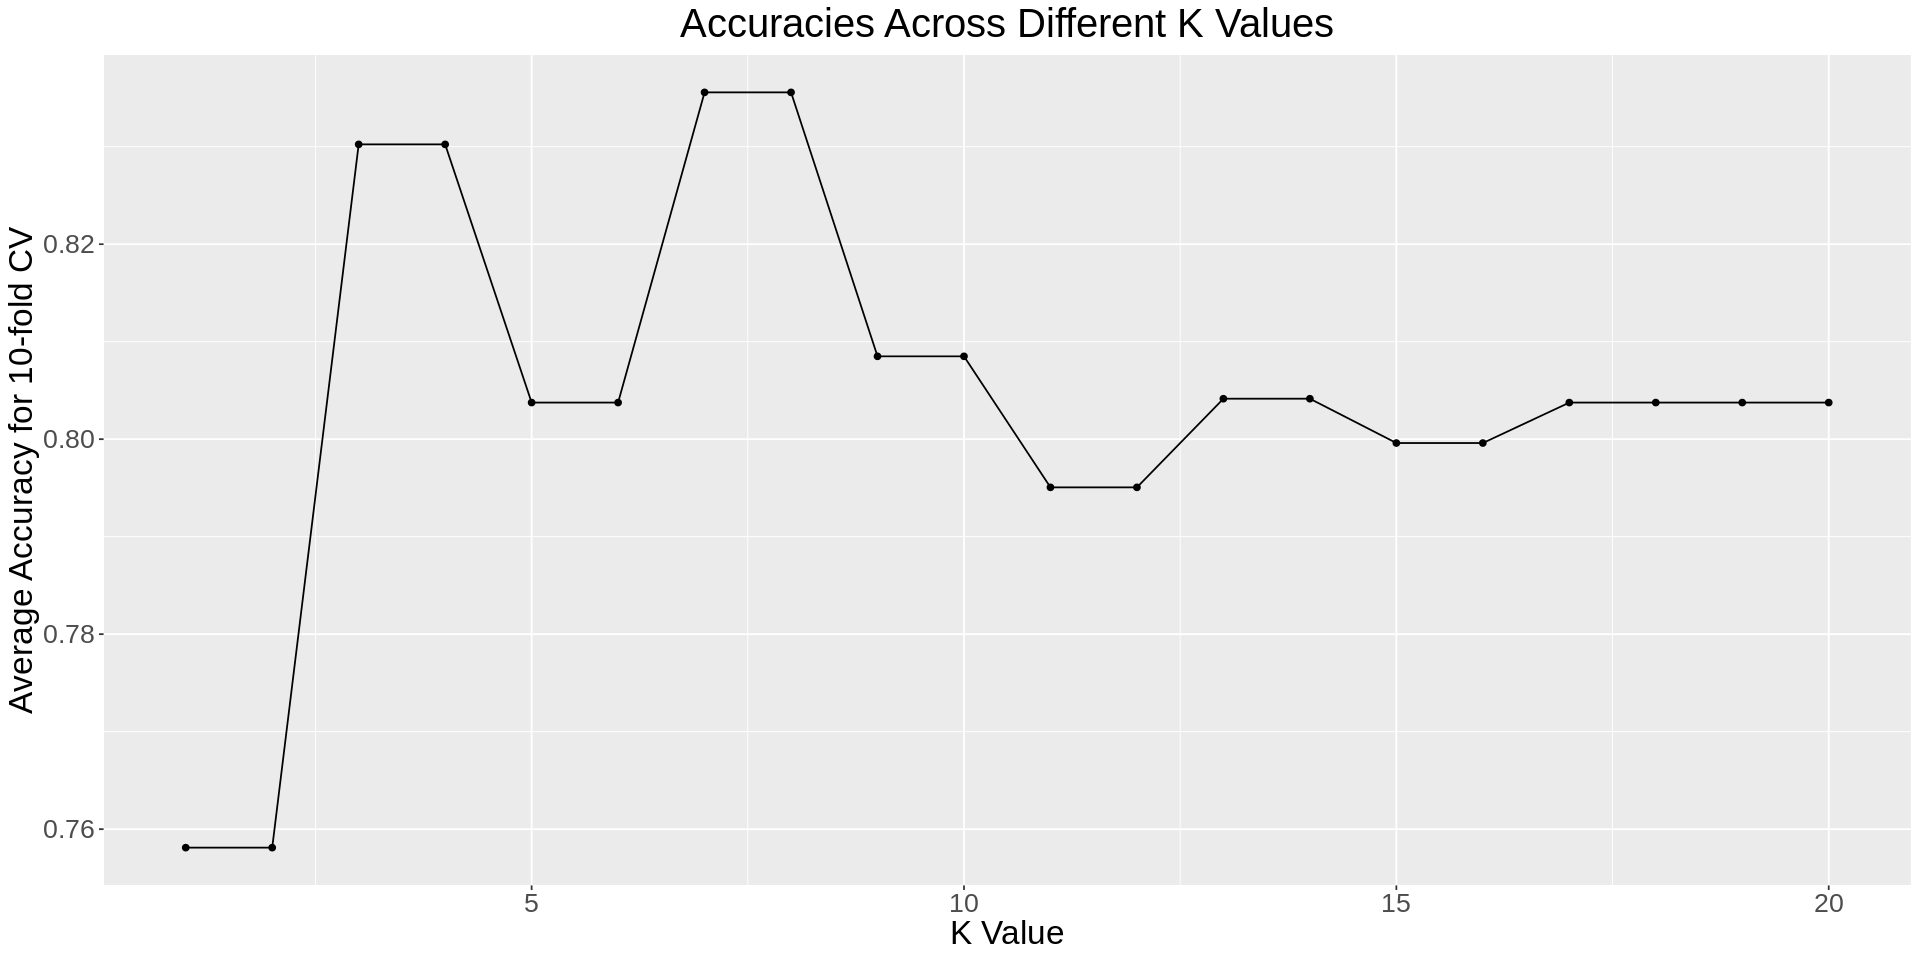

In [21]:
options(repr.plot.width = 16, repr.plot.height = 8)


k_accuracies_plot <- heart_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "K Value", y = "Average Accuracy for 10-fold CV") +
    ggtitle("Accuracies Across Different K Values") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.5))

k_accuracies_plot

### Building the Final `K` Model

# !!!!

In [22]:
best_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 50) |>
  set_engine("kknn") |>
  set_mode("classification")

# aest_recipe is previously defined
heart_fit <- workflow() |>
    add_recipe(aest_recipe) |>
    add_model(best_knn_spec) |>
    fit(data = heart_train)

print("Figure 5.2: Final Classification Model")
heart_fit

[1] "Figure 5.2: Final Classification Model"


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(50,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.21875
Best kernel: rectangular
Best k: 50

### Model Evaluation and Conclusion

# !!!!

In [23]:
heart_predictions <- predict(heart_fit, heart_test) |>
    bind_cols(heart_test)
heart_acc <- heart_predictions |>
    metrics(truth = DEATH_EVENT, estimate = .pred_class) |>
    select(.metric, .estimate) |>
    head(1)

print("Model Accuracy on the Testing Set")
heart_acc

[1] "Model Accuracy on the Testing Set"


.metric,.estimate
<chr>,<dbl>
accuracy,0.7333333


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



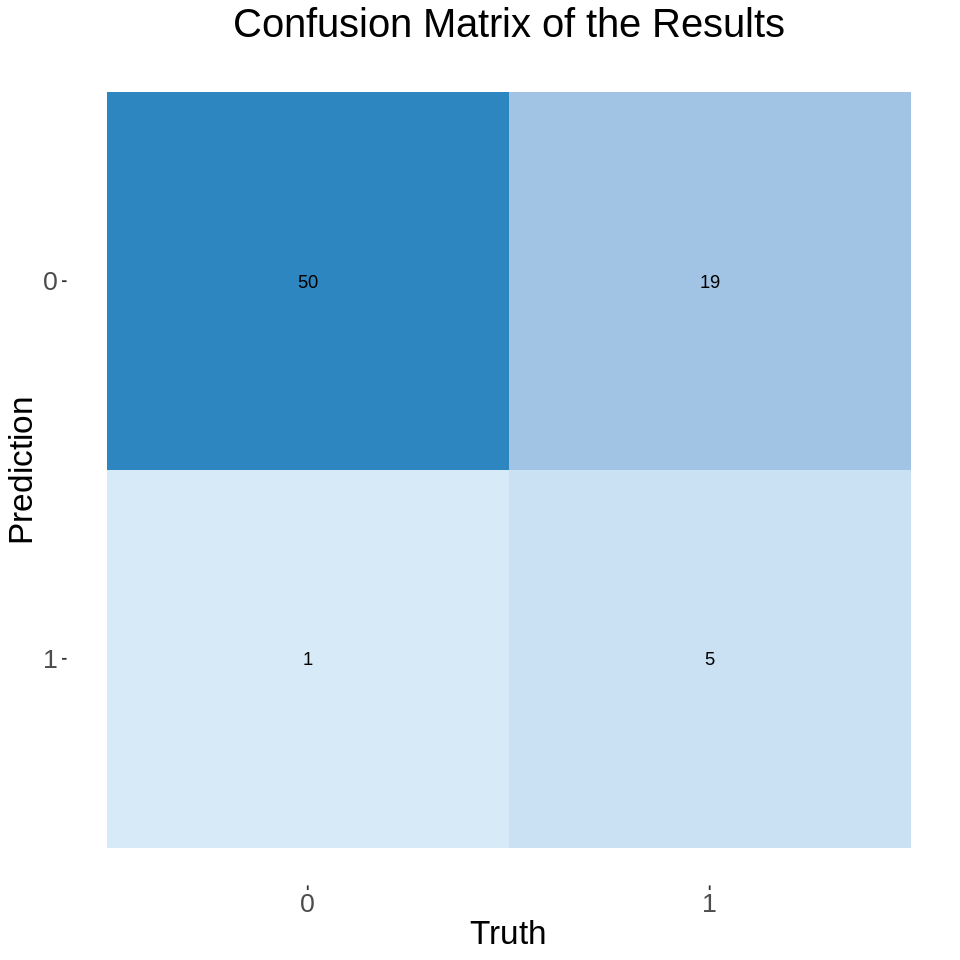

In [24]:
options(repr.plot.width = 8, repr.plot.height = 8)

heart_matrix <- heart_predictions |>
    conf_mat(truth = DEATH_EVENT, estimate = .pred_class) |>
     autoplot(type = "heatmap") +
    scale_fill_gradient(low="#D6EAF8",high = "#2E86C1") +
    labs(title = "Confusion Matrix of the Results") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.5))

heart_matrix

In [25]:
observations |>
    select(-creatinine_phosphokinase, -platelets, -serum_creatinine) |>
    print()

# A tibble: 2 × 4
  DEATH_EVENT   age ejection_fraction serum_sodium
  <fct>       <dbl>             <dbl>        <dbl>
1 0            58.8              40.3         137.
2 1            65.2              33.5         135.


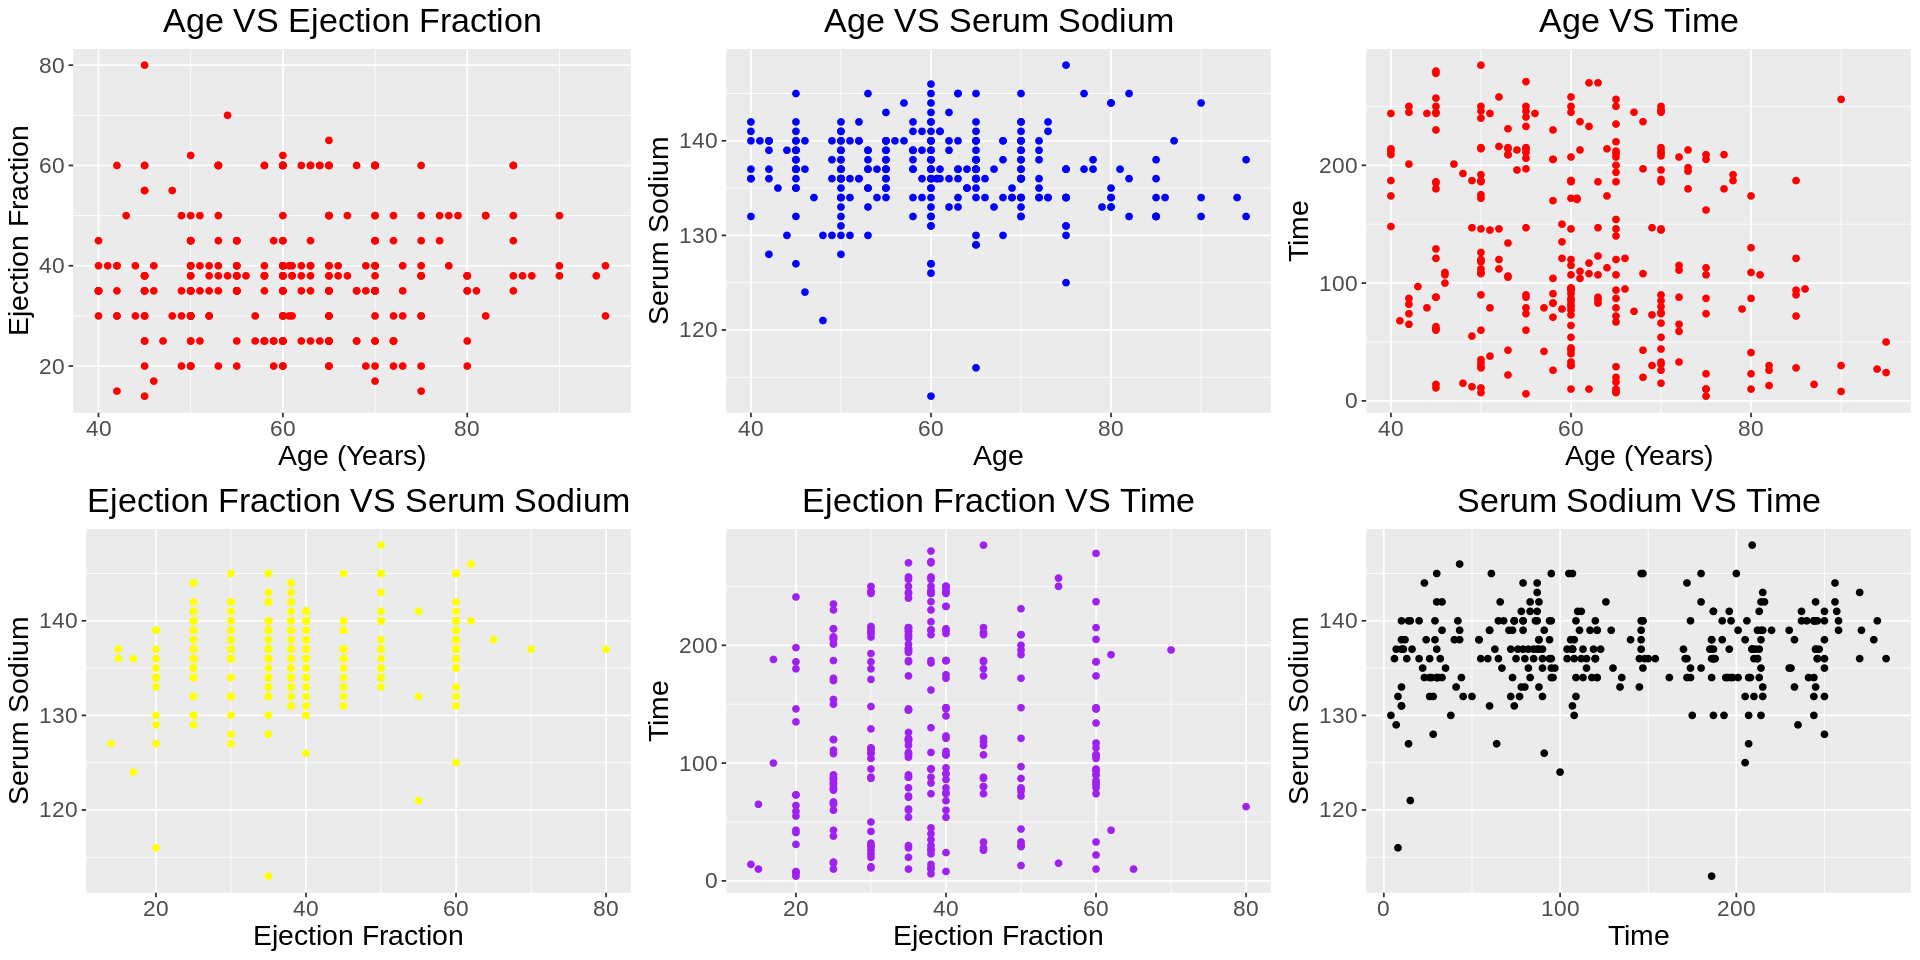

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 8)
age_vs_ef <- heart_data |>
    ggplot(aes(x = age, y = ejection_fraction)) +
    geom_point(color = "red") +
    labs(title = "Age VS Ejection Fraction", x = "Age (Years)", y = "Ejection Fraction") +
    theme(text = element_text(size = 17)) +
    theme(plot.title = element_text(hjust = 0.5))

age_vs_ss <- heart_data |>
    ggplot(aes(x = age, y = serum_sodium)) +
    geom_point(color = "blue") +
    labs(title = "Age VS Serum Sodium", x = "Age", y = "Serum Sodium") +
    theme(text = element_text(size = 17)) +
    theme(plot.title = element_text(hjust = 0.5))

age_vs_time <- heart_data |>
    ggplot(aes(x = age, y = time)) +
    geom_point(color = "red") +
    labs(title = "Age VS Time", x = "Age (Years)", y = "Time") +
    theme(text = element_text(size = 17)) +
    theme(plot.title = element_text(hjust = 0.5))

ef_vs_ss <- heart_data |>
    ggplot(aes(x = ejection_fraction, y = serum_sodium)) +
    geom_point(color = "yellow") +
    labs(title = "Ejection Fraction VS Serum Sodium", x = "Ejection Fraction", y = "Serum Sodium") +
    theme(text = element_text(size = 17)) +
    theme(plot.title = element_text(hjust = 0.5))

ef_vs_time <- heart_data |>
    ggplot(aes(x = ejection_fraction, y = time)) +
    geom_point(color = "purple") +
    labs(title = "Ejection Fraction VS Time", x = "Ejection Fraction", y = "Time") +
    theme(text = element_text(size = 17)) +
    theme(plot.title = element_text(hjust = 0.5))

ss_vs_time <- heart_data |>
    ggplot(aes(x = time, y = serum_sodium)) +
    geom_point(color = "black") +
    labs(title = "Serum Sodium VS Time", x = "Time", y = "Serum Sodium") +
    theme(text = element_text(size = 17)) +
    theme(plot.title = element_text(hjust = 0.5))

predictor_relation_plot <- plot_grid(age_vs_ef, age_vs_ss, age_vs_time, ef_vs_ss, ef_vs_time, ss_vs_time, ncol = 3)

predictor_relation_plot

#### Why our Variables were Chosen

In the project, we have built a model that predicts whether a patient suffering from heart failure will die. Our analysis through visualization using boxplots has shown that four variables have a significant effect on the variale we want to predict. These are, namely, `age`, `ejection_fraction`, `serum_sodium` and `time`. Further analysis has shown that the model using all four of these variables yields the highest accuracy.

#### Analysis of Accuracy (Reasons for Low Accuracy)

On the testing set, our model has an accuracy of 73%. This is to be expected, since our training set does not have many rows. In addition, as can be seen from Figure 1, there is a big difference in the number of patients that live and die in our dataset. As a result of the smaller number of patients that die, there is a greater chance that a prediction on an observation where the patient dies would say that he would live, as compared to if the number of observations for each category were equal. This can be seen from our confusion matrix, where 19 rows are wrongly predicted as alive. Further, we had to eliminate many variable at the beginning that could have a notable impact on predicting whether a patient will die, such as `high_blood_pressure`. This is because these variables are categorical and hence we cannot use them as predictor variables.

#### Real Life Implications

Since the accuracy of our predictive model is not high enough, it has a limited scope to be used in the medical field. At best, it can be used as a preliminary tool to assess whether a patient is at risk of dying. Since our model has a chance of giving a false positive, further testing must be done using more accurate methods.

#### Questions for Further Research
- Would including the categorical variables when building a prediction model give a higher accuracy, and if so, by how much?
- How does this model compare to existing models that predict heart failure?
- Could this model be used to identify groups of patients that are at a higher risk of dying, based on a paritcular factor?



### References

National Guideline Centre (UK). Chronic Heart Failure in Adults: Diagnosis and Management. London: National Institute for Health and Care Excellence (NICE); 2018 Sep. (NICE Guideline, No. 106.) 2, Introduction. Available from: https://www.ncbi.nlm.nih.gov/books/NBK536089/.


Lall, U., & Sharma, A. (1996). A nearest neighbor bootstrap for resampling hydrologic time series. Water Resources Research, 32(3), 679-693. https://doi.org/10.1029/95WR02966